In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from scipy.stats import linregress
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation
from skimage import measure

In [29]:
# Derivative of the logistic map
def logistic_derivative(r, x):
    return r * (1 - 2 * x)

# Fixed points: x = 0 and x = 1 - 1/r (if r != 0)
def fixed_points(r):
    return [0, 1 - 1/r] if r != 0 else [0]

# check stability
def stability(r, x_star):
    derivative = logistic_derivative(r, x_star)
    return abs(derivative) < 1

r_values = [1, 2, 3, 4]

for r in r_values:
    print(f"\nFor r = {r}:")
    for x_star in fixed_points(r):
        stable = stability(r, x_star)
        print(f"  Fixed point: x* = {x_star:.3f} | Derivative: {logistic_derivative(r, x_star):.3f} | {'Stable' if stable else 'Unstable'}")



For r = 1:
  Fixed point: x* = 0.000 | Derivative: 1.000 | Unstable
  Fixed point: x* = 0.000 | Derivative: 1.000 | Unstable

For r = 2:
  Fixed point: x* = 0.000 | Derivative: 2.000 | Unstable
  Fixed point: x* = 0.500 | Derivative: 0.000 | Stable

For r = 3:
  Fixed point: x* = 0.000 | Derivative: 3.000 | Unstable
  Fixed point: x* = 0.667 | Derivative: -1.000 | Unstable

For r = 4:
  Fixed point: x* = 0.000 | Derivative: 4.000 | Unstable
  Fixed point: x* = 0.750 | Derivative: -2.000 | Unstable


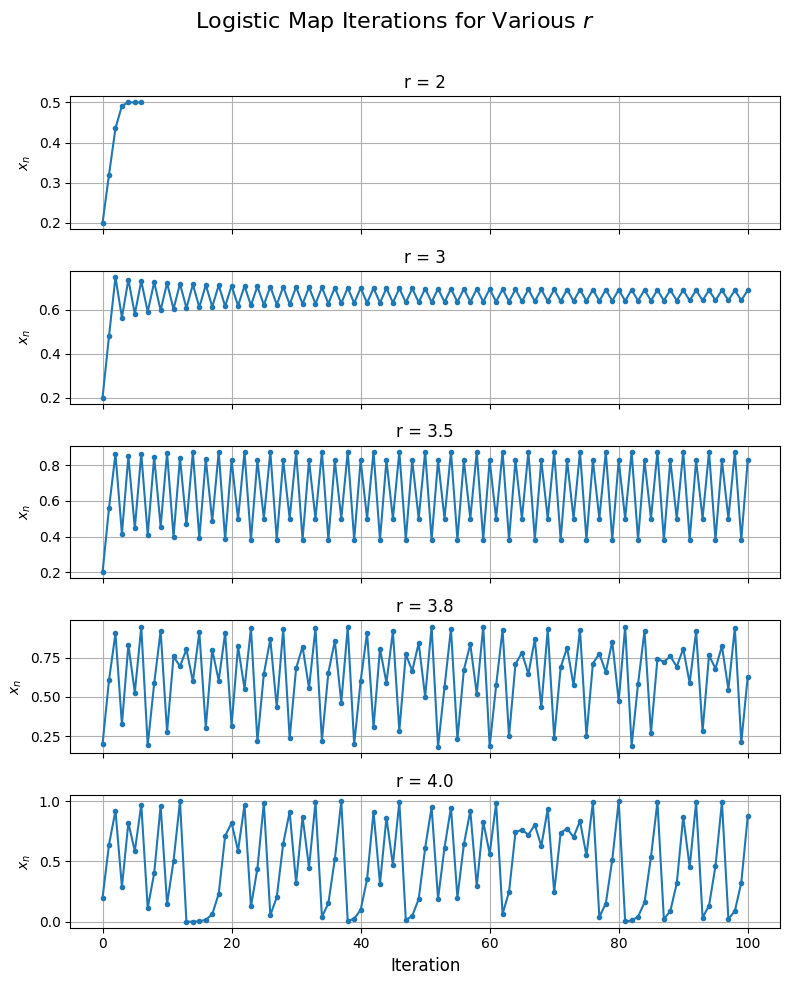

<Figure size 640x480 with 0 Axes>

In [30]:
def logistic_map(r, x0, threshold=1e-6, max_iter=100):
    """Iterate the logistic map until convergence or max_iter is reached."""
    x_values = [x0]
    for _ in range(max_iter):
        x_next = r * x_values[-1] * (1 - x_values[-1])
        x_values.append(x_next)
        if abs(x_next - x_values[-2]) < threshold:
            break
    return x_values

# Parameters
r_values = [2, 3, 3.5, 3.8, 4.0]
x0 = 0.2
threshold = 1e-6

fig, axes = plt.subplots(len(r_values), 1, figsize=(8, 10), sharex=True)

for i, r in enumerate(r_values):
    x_values = logistic_map(r, x0, threshold)
    axes[i].plot(range(len(x_values)), x_values, marker='o', markersize=3, linestyle='-', color='tab:blue')
    axes[i].set_title(f"r = {r}", fontsize=12)
    axes[i].set_ylabel('$x_n$')
    axes[i].grid(True)

axes[-1].set_xlabel('Iteration', fontsize=12)
plt.suptitle('Logistic Map Iterations for Various $r$', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
plt.savefig("1b")

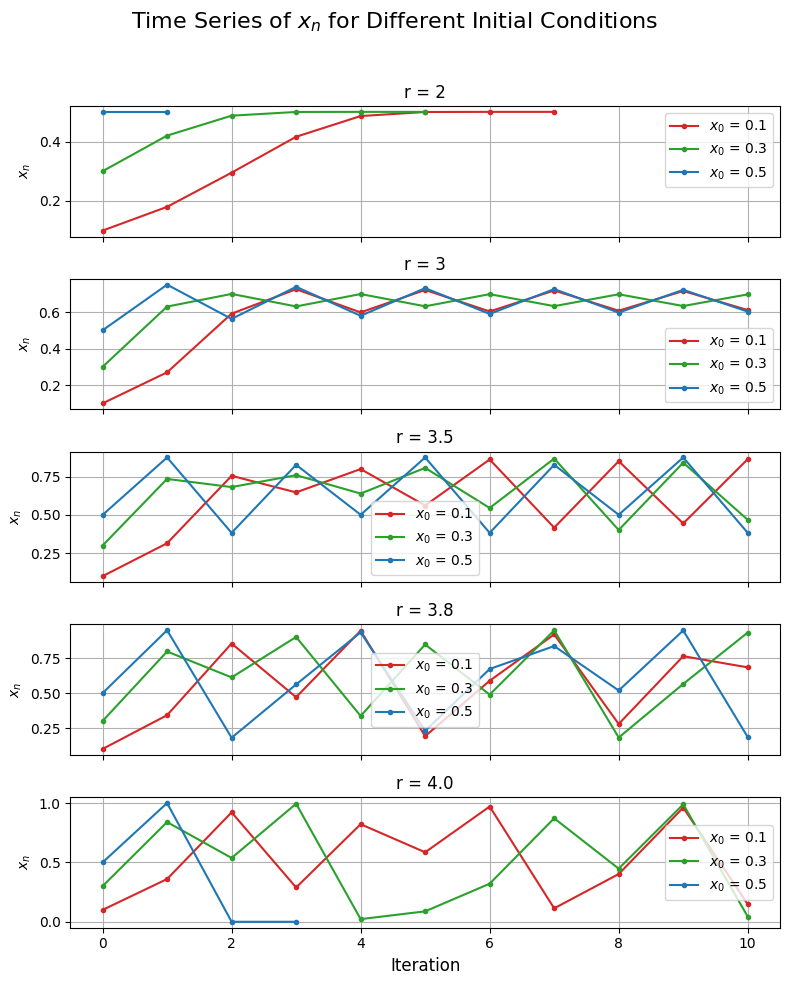

<Figure size 640x480 with 0 Axes>

In [31]:
# Parameters
initial_conditions = [0.1, 0.3, 0.5]
r_values = [2, 3, 3.5, 3.8, 4.0]
colors = ['tab:red', 'tab:green', 'tab:blue']

# Plot time series for different r and initial conditions
fig, axes = plt.subplots(len(r_values), 1, figsize=(8, 10), sharex=True)

for i, r in enumerate(r_values):
    for x0, color in zip(initial_conditions, colors):
        x_values = logistic_map(r, x0, threshold, max_iter=10)
        axes[i].plot(range(len(x_values)), x_values, label=f"$x_0$ = {x0}", color=color, marker='o', markersize=3, linestyle='-')
    axes[i].set_title(f"r = {r}", fontsize=12)
    axes[i].set_ylabel('$x_n$')
    axes[i].grid(True)
    axes[i].legend()

axes[-1].set_xlabel('Iteration', fontsize=12)
plt.suptitle('Time Series of $x_n$ for Different Initial Conditions', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
plt.savefig("1c")


The plots show clearly, that the systems evolution depends more heavily on the initial conditions if $r$ is larger and approaches chaotic behaviour as $r$ approaches 4.

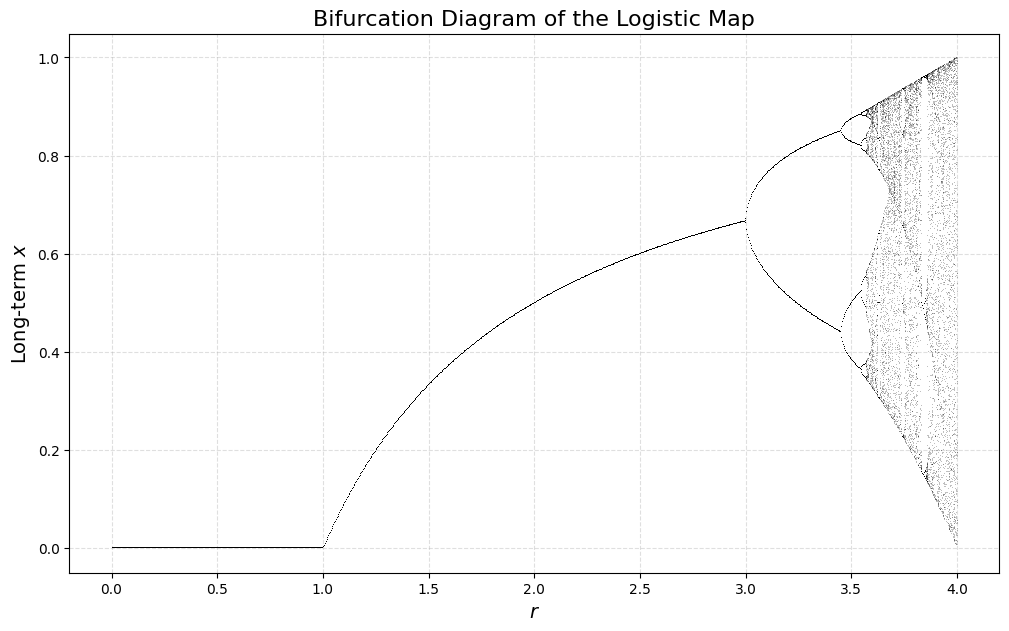

In [32]:
# Parameters for bifurcation diagram
r_values = np.linspace(0, 4, 1000)  # Fine r resolution
iterations = 1000                   # Total iterations per r
last = 100                          # Points to plot after discarding transients
x0 = 0.2                            # Initial condition

# Data storage for plotting
r_list, x_list = [], []

for r in r_values:
    x = x0
    # Transient iterations (discarded)
    for _ in range(iterations - last):
        x = r * x * (1 - x)
    # Long-term iterations (plotted)
    for _ in range(last):
        x = r * x * (1 - x)
        r_list.append(r)
        x_list.append(x)

# Plotting the bifurcation diagram
plt.figure(figsize=(12, 7))
plt.plot(r_list, x_list, ',k', alpha=0.25)
plt.title('Bifurcation Diagram of the Logistic Map', fontsize=16)
plt.xlabel('$r$', fontsize=14)
plt.ylabel('Long-term $x$', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


In [33]:
def detect_period(sequence, tol=1e-5):
    """Detect the smallest period in a sequence within a tolerance."""
    length = len(sequence)
    for period in range(1, length // 2 + 1):
        # Check if the sequence repeats after 'period' steps
        if all(abs(sequence[i] - sequence[i + period]) < tol for i in range(length - period)):
            return period
    return None  # No clear period found

# Parameters
r_values = np.linspace(2.5, 4, 20000)
iterations = 1000
last = 200
x0 = 0.2
chaos_onset = None

bifurcation_points = []
previous_period = None

for r in r_values:
    x = x0
    # Burn-in iterations
    for _ in range(iterations - last):
        x = r * x * (1 - x)

    # Collect steady-state points
    steady_points = []
    for _ in range(last):
        x = r * x * (1 - x)
        steady_points.append(x)

    # Detect period of steady-state sequence
    period = detect_period(steady_points)

    # Record bifurcation if period changes
    if period is not None and period != previous_period:
        bifurcation_points.append((r, period))
        previous_period = period
    
    # Detect chaos onset (no period detected after previously periodic region)
    if period is None and previous_period is not None and chaos_onset is None:
        chaos_onset = r

# Print bifurcation points
if bifurcation_points:
    print("Detected bifurcation points (r, period):")
    for r, period in bifurcation_points:
        print(f"r ≈ {r:.4f} → period: {period}")
else:
    print("No bifurcation points detected.")


if chaos_onset:
    print(f"Chaos onset detected at r ≈ {chaos_onset:.4f}")
else:
    print("\nNo chaos onset detected.")

Detected bifurcation points (r, period):
r ≈ 2.5000 → period: 1
r ≈ 2.9892 → period: 2
r ≈ 3.4459 → period: 4
r ≈ 3.5427 → period: 8
r ≈ 3.5639 → period: 16
r ≈ 3.5686 → period: 32
r ≈ 3.5696 → period: 64
r ≈ 3.5705 → period: 48
r ≈ 3.5716 → period: 40
r ≈ 3.5726 → period: 24
r ≈ 3.5727 → period: 48
r ≈ 3.5728 → period: 96
r ≈ 3.5735 → period: 80
r ≈ 3.5741 → period: 64
r ≈ 3.5776 → period: 20
r ≈ 3.5777 → period: 40
r ≈ 3.5777 → period: 80
r ≈ 3.5793 → period: 56
r ≈ 3.5821 → period: 12
r ≈ 3.5828 → period: 24
r ≈ 3.5832 → period: 48
r ≈ 3.5833 → period: 96
r ≈ 3.5863 → period: 20
r ≈ 3.5894 → period: 16
r ≈ 3.5942 → period: 18
r ≈ 3.5955 → period: 22
r ≈ 3.5972 → period: 14
r ≈ 3.6053 → period: 10
r ≈ 3.6059 → period: 20
r ≈ 3.6063 → period: 40
r ≈ 3.6105 → period: 36
r ≈ 3.6136 → period: 14
r ≈ 3.6137 → period: 28
r ≈ 3.6266 → period: 6
r ≈ 3.6303 → period: 12
r ≈ 3.6322 → period: 24
r ≈ 3.6326 → period: 48
r ≈ 3.6340 → period: 18
r ≈ 3.6470 → period: 10
r ≈ 3.6472 → period: 20
r ≈ 

C:\Users\owenp\AppData\Local\Temp\ipykernel_12180\2103197161.py:9: RuntimeWarning: invalid value encountered in scalar power
  x = r * x * (1 - x**gamma)  # Modified logistic map


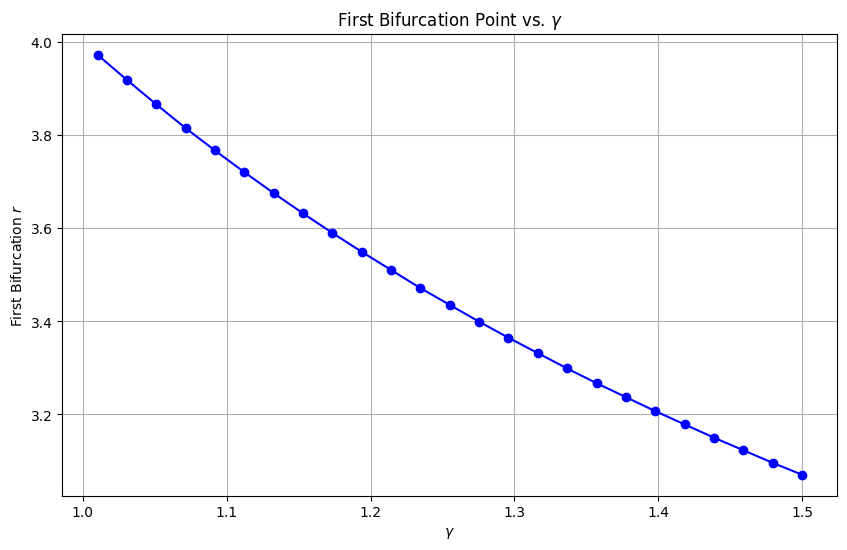

<Figure size 640x480 with 0 Axes>

In [34]:
def first_bifurcation_r(gamma, r_values, iterations=1000, last=200, tol=1e-3):
    """Find the first bifurcation point for a given gamma."""
    x0 = 0.2
    previous_period = None

    for r in r_values:
        x = x0
        for _ in range(iterations - last):
            x = r * x * (1 - x**gamma)  # Modified logistic map

        steady_points = [r * x * (1 - x**gamma) for _ in range(last)]
        period = detect_period(steady_points, tol=tol)

        if previous_period == 1 and period != 1:  # First bifurcation detected
            return r

        if period:
            previous_period = period

    return None  # No bifurcation found

# Parameters
gamma_values = np.linspace(0.5, 1.5, 50)
r_values = np.linspace(2.5, 4, 1000)
bifurcation_rs = [first_bifurcation_r(gamma, r_values) for gamma in gamma_values]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, bifurcation_rs, marker='o', linestyle='-', color='b')
plt.xlabel(r'$\gamma$')
plt.ylabel('First Bifurcation $r$')
plt.title('First Bifurcation Point vs. $\gamma$')
plt.grid(True)
plt.show()
plt.savefig("1e")

### Question 2

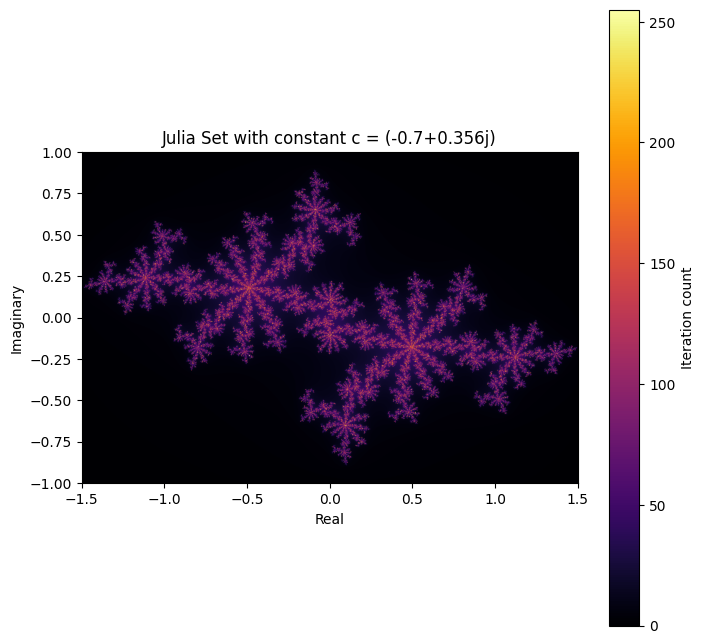

<Figure size 640x480 with 0 Axes>

In [35]:
# Parameters
width, height = 800, 800
x_min, x_max = -1.5, 1.5
y_min, y_max = -1, 1
c = complex(-0.7, 0.356)
max_iter = 256

# Create coordinate grid
x = np.linspace(x_min, x_max, width)
y = np.linspace(y_min, y_max, height)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Julia set iteration
julia = np.zeros(Z.shape, dtype=int)
mask = np.ones(Z.shape, dtype=bool)

for i in range(max_iter):
    Z[mask] = Z[mask]**2 + c
    escaped = np.abs(Z) > 2
    julia[mask & escaped] = i
    mask &= ~escaped

# Plot
plt.figure(figsize=(8, 8))
plt.imshow(julia, extent=[x_min, x_max, y_min, y_max], cmap='inferno', origin='lower')
plt.title(f"Julia Set with constant c = {c}")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.colorbar(label="Iteration count")
plt.show()
plt.savefig("2a")

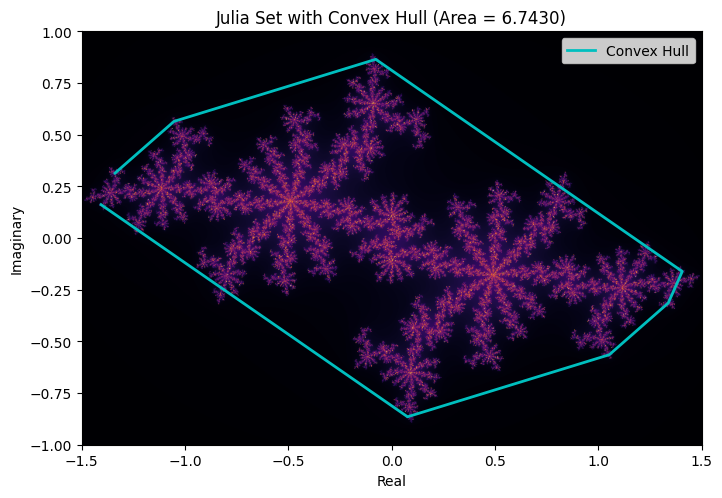

Convex hull area: 6.7430


<Figure size 640x480 with 0 Axes>

In [36]:
# Extract points belonging to the Julia set (non-escaped points)
points = np.column_stack((X[mask], Y[mask]))

# Compute convex hull
hull = ConvexHull(points)

# Plot Julia set with convex hull
plt.figure(figsize=(8, 8))
plt.imshow(julia, extent=[x_min, x_max, y_min, y_max], cmap='inferno', origin='lower')
plt.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'c-', linewidth=2, label='Convex Hull')
plt.title(f"Julia Set with Convex Hull (Area = {hull.area:.4f})")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.legend()
plt.show()
plt.savefig("2b")

# Output the area
print(f"Convex hull area: {hull.area:.4f}")

In [ ]:
# Function to generate the Julia set
def julia_set(c, width=800, height=800, xmin=-1.5, xmax=1.5, ymin=-1, ymax=1, max_iter=256):
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    img = np.full(Z.shape, max_iter, dtype=int)  # Initialize with max_iter to prevent empty regions

    for i in range(max_iter):
        mask = np.abs(Z) < 2  # Only update pixels that haven't escaped
        Z[mask] = Z[mask] ** 2 + c
        img[mask] = i  # Assign iteration count to pixel

    return img

# Function to compute area using the Shoelace theorem
def compute_area(contour):
    x = contour[:, 1]  # Extract x-coordinates
    y = contour[:, 0]  # Extract y-coordinates
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

# Generate Julia set
c = complex(-0.7, 0.356)  # Given constant
julia = julia_set(c)

# Normalize image for better visualization
julia = julia / julia.max()

# Convert to binary for contour detection
binary_julia = (julia < 0.9).astype(np.uint8)  # Threshold at 90% of max for better contour detection

# Find contours using skimage
contours = measure.find_contours(binary_julia, level=0.5)

# Compute total enclosed area
total_area = sum(compute_area(contour) for contour in contours)

# Plot the Julia set with contours
plt.figure(figsize=(8, 8))
plt.imshow(julia, cmap='inferno', extent=[-1.5, 1.5, -1, 1])
for contour in contours:
    plt.plot(contour[:, 1] / 800 * 3 - 1.5, contour[:, 0] / 800 * 2 - 1, 'w', linewidth=1.5)
plt.title(f"Julia Set with Contour (Enclosed Area: {total_area:.2f})")
plt.show()

# Print enclosed area
print(f"Enclosed Area of Julia Set Contour: {total_area:.2f}")




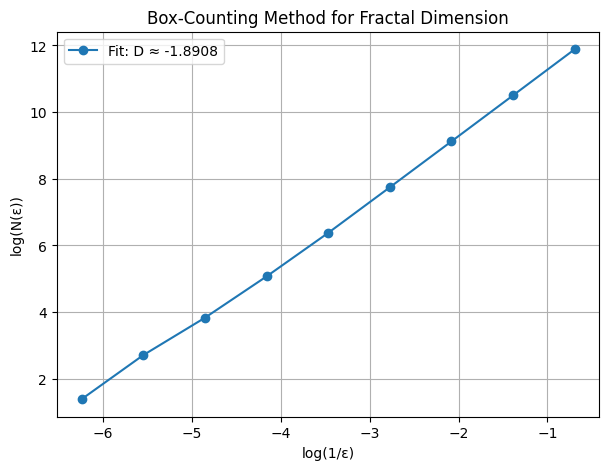

Estimated fractal dimension: -1.8908


<Figure size 640x480 with 0 Axes>

In [38]:
def box_count(Z, k):
    """Count the number of boxes of size k that contain part of the set."""
    S = np.add.reduceat(
        np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
        np.arange(0, Z.shape[1], k), axis=1)
    return np.count_nonzero(S)

def fractal_dimension(Z, min_box_size=2):
    """Calculate the fractal dimension of a 2D set Z using the box-counting method."""
    # Ensure binary image (1 where set is present, 0 otherwise)
    Z = (Z > 0).astype(int)
    
    # Box sizes (must divide image size)
    sizes = 2**np.arange(int(np.log2(min(Z.shape))), int(np.log2(min_box_size)) - 1, -1)
    
    counts = [box_count(Z, size) for size in sizes]
    
    # Perform linear regression on log-log plot
    coeffs = linregress(np.log(1/sizes), np.log(counts))
    dimension = -coeffs.slope
    
    # Plot the scaling
    plt.figure(figsize=(7, 5))
    plt.plot(np.log(1/sizes), np.log(counts), 'o-', label=f'Fit: D ≈ {dimension:.4f}')
    plt.xlabel('log(1/ε)')
    plt.ylabel('log(N(ε))')
    plt.title('Box-Counting Method for Fractal Dimension')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return dimension

# Compute fractal dimension
dimension = fractal_dimension(julia)
plt.savefig("2c")
print(f"Estimated fractal dimension: {dimension:.4f}")


### Question 3

#### Part a
The original application of the lorentz equations was to model a simplified version of atmospheric convection. Here $x$ describes the convective flow velocity, $y$ the temperature difference between air moving up or down and $z$ the deviation of vertical temperature profile from linearity. The constants would describe with $\sigma$ how quickly heat diffuses relative to fluid momentum, with $\rho$ the temperature difference driving convection and finally with $\beta$ the geometry factor related to the aspect ratio of the convection cell.

In [ ]:
# Lorenz system parameters
sigma = 10
rho = 48
beta = 3

def lorenz(t, state):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Time range and initial conditions
t_span = (0, 12)
t_eval = np.linspace(t_span[0], t_span[1], 100)
initial_state = [1, 1, 1]

# Solve the Lorenz system
sol = solve_ivp(lorenz, t_span, initial_state, t_eval=t_eval)
x, y, z = sol.y

# Create the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((min(x), max(x)))
ax.set_ylim((min(y), max(y)))
ax.set_zlim((min(z), max(z)))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor Trajectories')
plt.savefig("3b")

# Initialize plot line
line, = ax.plot([], [], [], lw=2, color='blue')

# Animation function
def animate(i):
    line.set_data(x[:i], y[:i])
    line.set_3d_properties(z[:i])
    return line,

# Create animation
anim = FuncAnimation(fig, animate, frames=len(t_eval), interval=20, blit=True)

# Save animation
anim.save('lorenz_attractor.mp4', writer='ffmpeg', fps=30)

plt.show()
